# Modelo simplex dual


### Este metodo esta diseñado para minimizacion 
### Si se desea resolver una maximizacion las entradas del mismo se deben multiplicar por -1 ( solo aquellas restricciones las cuales tengan un > = 

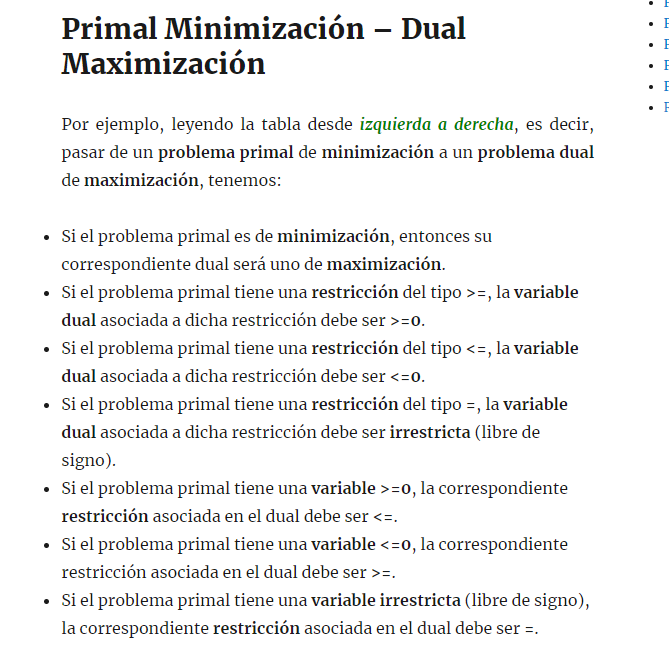

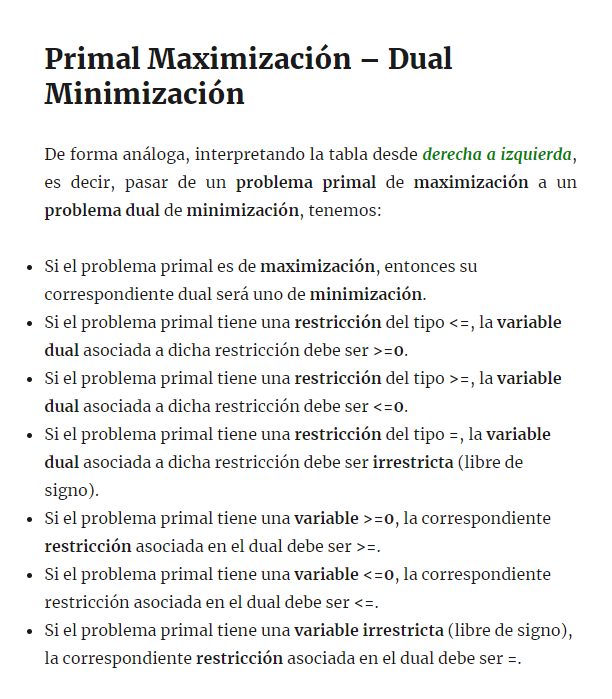

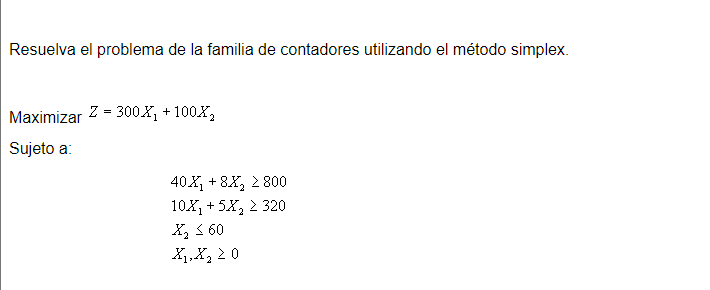

In [1]:
"""
Dual Simplex Method
Passing legal tableau
"""

'''[["w", "y_1", "y_2", "y_3", "e_1", "e_2", "e_3","e_4", "rhs", "bv"],
                                [1, 0,  5, 0, 0, 10, 10,0, 280, "w"],
                                [0, 0, -2, 0, 1, 2, -8, 0,  24, "e_1" ],
                                [0, 0, -5, 1, 0, 2, -4,0, 8, "y_3"],
                                [0, 1, 5/4,0, 0, -1/2, 3/2,0, 2, "y_1"],
                                [0, 0, 0.25, 0, 0, -0.5, 1.5, 1, -10, "e_4"]]'''
import pandas as pd
from fractions import Fraction


class DualSimplexMethod:
    def __init__(self, legal_tableau):
        self.__legal_tableau = legal_tableau
        df = pd.DataFrame(self.__legal_tableau)
        # columns=self.table_columns)
        df.style.set_properties(**{'text-align': 'center'})
        print(df)
        self.__variables =self.__legal_tableau[0]
        self.__row_0 = self.__legal_tableau[1][:-1]
        self.__rows =[__i[:-1] for __i in self.__legal_tableau[2:]]
        self.__rhs = [__i[-2]  for __i in self.__legal_tableau[1:]]
        self.__basic_variables = [__i[-1] for __i in self.__legal_tableau[1:]]
        self._to_positive_coeff()

    def __find_pivot_element(self, pivot_row):
        count = 0
        pivot_index = 0
        MIN = 0

        for indx, ele in enumerate(pivot_row[:-1]):
            if ele < 0:
                ratio = round(self.__row_0[:-1][indx]/ele, 2)
                if count == 0:
                    MIN = ratio
                    pivot_index = indx
                else:
                    #print(MIN, ratio, ele, self.__row_0[:-1][indx])
                    if MIN < ratio:
                        MIN = ratio
                        pivot_index = indx
                        #print(ratio, 'ji')
                count += 1

        pivot_element = pivot_row[pivot_index]

        return pivot_index, pivot_element

    def substraction_op(self, indx, multiplied_row_0, multiplied_pivot_row):
        return multiplied_row_0[indx] + multiplied_pivot_row[indx]


    def __calculate_row_elementary_operation(self, pivot_row, row, pivot_index, pivot_element ):

        multiplied_row = [__i * pivot_row[pivot_index] if __i != 0 else __i for __index, __i in enumerate( row )]
        multiplied_pivot_row = [__i * row[pivot_index] if __i != 0 else __i for __index, __i in enumerate(pivot_row)]

        if sum([multiplied_pivot_row[pivot_index], multiplied_row[pivot_index]]) != 0:
            multiplied_pivot_row = [__i * -1 for __index, __i in enumerate(multiplied_pivot_row)]

        row_new_row = [self.substraction_op(__i, multiplied_row, multiplied_pivot_row) for __i in
                                  range(len(multiplied_pivot_row))]
        return row_new_row

    def calculate_ratio_quantities_replacements(self, leaving_idx_row):
        pivot_row = self.__rows[leaving_idx_row]
        #print(pivot_row)
        pivot_index, pivot_element =self.__find_pivot_element(pivot_row)
        #print(pivot_index,pivot_element, leaving_idx_row)
        pivot_row = [__i/pivot_element if __i != 0 else __i for __i in pivot_row ]

        new_row_0 =self.__calculate_row_elementary_operation(pivot_row, self.__row_0, pivot_index, pivot_element)
        self.__row_0 = new_row_0
        for idx_row, other_row in enumerate(self.__rows):
            if idx_row != leaving_idx_row:
                new_row  = self.__calculate_row_elementary_operation(pivot_row, other_row, pivot_index, pivot_element)
                self.__rows[idx_row] = new_row
        self.__rows[leaving_idx_row] = pivot_row

        self.__rhs = [self.__row_0[-1]] +[__i[-1]  for __i in self.__rows]
        self.__basic_variables[leaving_idx_row + 1]=self.__variables[pivot_index]


        print('----------------------------------------------------------------------------------------------------')

        table_rows = [self.__variables] + [self.__row_0 + [self.__basic_variables[0]]] + \
                     [__row + [self.__basic_variables[__index + 1]] for __index, __row in enumerate(self.__rows)]

        df = pd.DataFrame(table_rows)

        df.style.set_properties(**{'text-align': 'center'})

        print(df)
        print('-----------------------------------------------------------------------------------------------------')



    def _to_positive_coeff(self):
        #print(self.__rhs[1:])
        if [__v for __v in self.__rhs[1:] if __v < 0]:
            smallest_ele = min(self.__rhs[1:])
            leaving_idx_row = self.__rhs[1:].index(smallest_ele)
            self.calculate_ratio_quantities_replacements(leaving_idx_row)
            return self._to_positive_coeff()
        
        
#Aqui se introduce la funcion a realizar
        
S =[["w", "y_1", "y_2",  "e_1", "e_2", "e_3", "rhs", "bv"],
                                [2, 3, 5, 6, "w"],
                                [1, 2, 3, 1,2,"e_1" ],
                                [-2, 1, -1, 3,-3,"e_3"],
                                



SyntaxError: unexpected EOF while parsing (2234954861.py, line 118)

In [39]:
if __name__ == '__main__':
    DualSimplexMethod(S)

   0    1    2    3    4    5     6    7
0  w  y_1  y_2  e_1  e_2  e_3   rhs   bv
1  1  300  100    0    0    0     0    w
2  0  -40   -8    1    0    0  -800  e_1
3  0  -10   -5    0    1    0  -320  e_2
4  0    0    1    0    0    1    60  e_3
----------------------------------------------------------------------------------------------------
     0    1     2      3    4    5       6    7
0    w  y_1   y_2    e_1  e_2  e_3     rhs   bv
1  1.0  0.0  40.0    7.5    0    0 -6000.0    w
2    0  1.0   0.2 -0.025    0    0    20.0  y_1
3    0  0.0  -3.0  -0.25  1.0    0  -120.0  e_2
4    0  0.0   1.0    0.0    0  1.0    60.0  e_3
-----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
     0    1    2         3          4    5       6    7
0    w  y_1  y_2       e_1        e_2  e_3     rhs   bv
1  1.0  0.0  0.0  4.166667  13.333333    0 -7600.0